## Statistic

In [2]:
import pandas as pd

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024으로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# 결과 출력
train.head(10)

,yymm,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,Target
0,2024-03-01 00:00:00,-5.327,12.250,-3.294,-7.855,-1.196,13.824,-10.249,-3.04,-5.170,...,0.103,1.001,-5.861,-27.695,-9.978,-2.689,-0.951,-3.873,0.471,44.521
1,2024-03-01 00:10:00,-5.267,12.916,-3.220,-7.788,-1.196,14.424,-10.249,-3.04,-4.970,...,0.073,0.935,-5.881,-37.695,-10.038,-2.652,-1.018,-3.503,0.361,35.027
2,2024-03-01 00:20:00,-5.127,13.583,-3.130,-7.658,-1.196,15.081,-10.359,-3.04,-4.830,...,0.013,0.905,-5.891,-37.695,-10.001,-2.652,-1.051,-3.436,0.361,13.920
3,2024-03-01 00:30:00,-5.060,14.250,-3.130,-7.532,-1.196,14.961,-10.359,-3.04,-4.830,...,-0.020,0.845,-5.911,-37.695,-10.028,-2.552,-1.111,-3.346,0.261,28.410
4,2024-03-01 00:40:00,-4.967,14.916,-3.094,-7.462,-1.196,15.454,-10.359,-3.04,-4.970,...,-0.087,0.811,-5.931,-37.695,-10.111,-2.619,-1.141,-3.346,0.261,1.647
5,2024-03-01 00:50:00,-4.967,15.583,-3.020,-7.388,-1.196,15.284,-10.419,-3.04,-4.860,...,-0.087,0.745,-5.941,-37.695,-10.111,-2.689,-1.208,-3.346,0.171,6.360
6,2024-03-01 01:00:00,-4.827,16.250,-2.920,-7.288,-1.196,15.351,-10.449,-3.04,-4.933,...,-0.153,0.695,-5.961,-47.695,-10.171,-2.762,-1.275,-3.346,0.171,34.535
7,2024-03-01 01:10:00,-4.797,16.250,-2.920,-7.222,-1.196,14.188,-10.516,-3.04,-4.860,...,-0.187,0.645,-6.111,-37.695,-10.478,-2.689,-1.341,-3.206,0.071,21.335
8,2024-03-01 01:20:00,-4.737,16.250,-2.830,-7.188,-1.196,14.048,-10.659,-3.04,-4.933,...,-0.260,0.645,-6.261,-37.695,-10.744,-2.689,-1.451,-3.073,0.004,34.687
9,2024-03-01 01:30:00,-4.900,16.250,-2.890,-7.188,-1.196,14.014,-10.659,-3.04,-4.430,...,-0.297,0.535,-6.411,-37.695,-10.941,-2.792,-1.551,-2.706,0.038,34.136


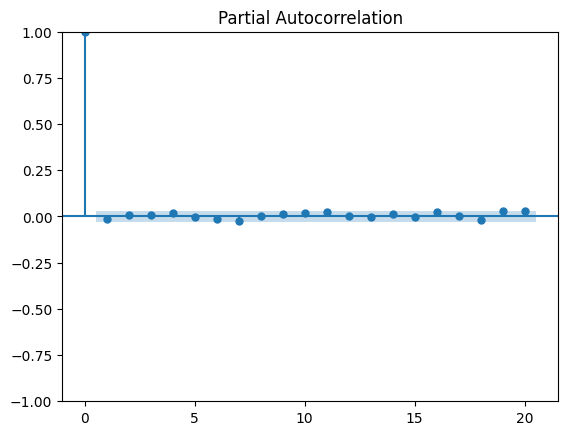

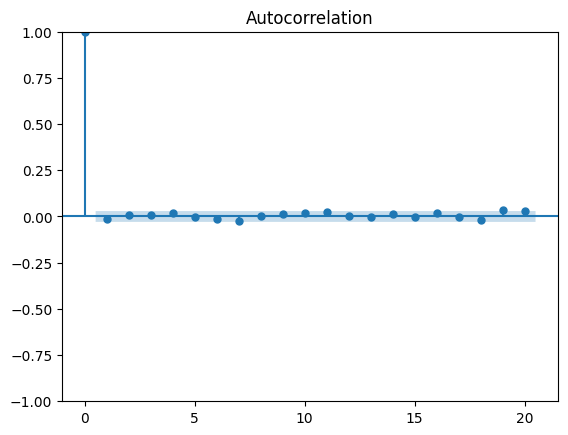

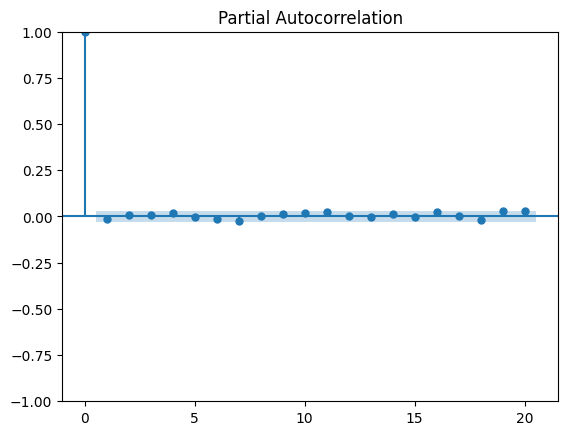

In [3]:
# 자기상관함수 도표를 통한 검증
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 자기상관함수 도표
plot_acf(train['Target'], lags=20)
plot_pacf(train['Target'], lags=20)

                               SARIMAX Results                                
Dep. Variable:                 Target   No. Observations:                 3571
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14614.449
Date:                Sat, 02 Nov 2024   AIC                          29234.898
Time:                        22:38:50   BIC                          29253.440
Sample:                    03-01-2024   HQIC                         29241.509
                         - 03-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8732      0.241    103.039      0.000      24.400      25.346
ar.L1         -0.0045      0.017     -0.269      0.788      -0.037       0.028
sigma2       209.9765      7.928     26.485      0.0

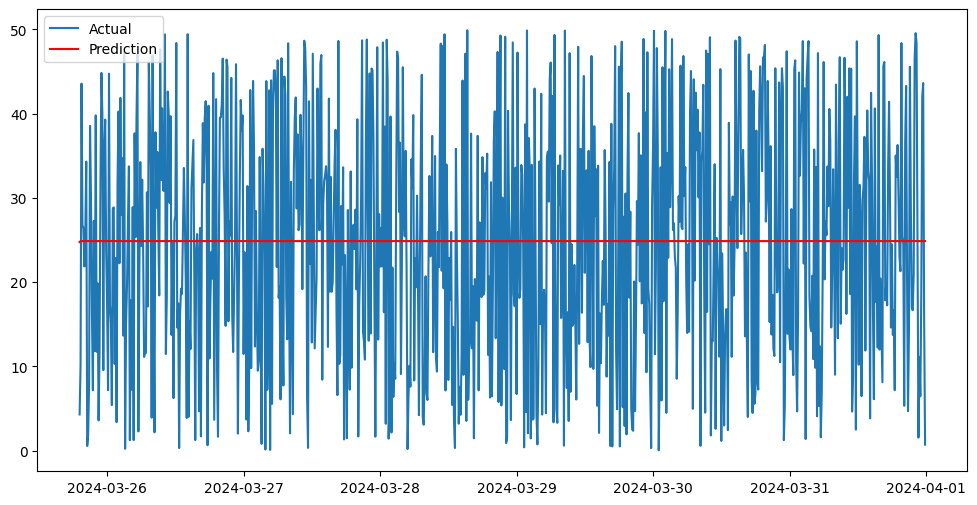

MAE: 12.336828292400378


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

train = train.set_index('yymm')
train = train['Target']

# 주기(frequency) 설정
train.index.freq = '10min'

# Train/Test Split
train_size = int(len(train) * 0.8)
train, test = train[:train_size], train[train_size:]

# ARIMA 모델 학습
model = ARIMA(train, order=(1, 0, 0))
model_fit = model.fit() 
print(model_fit.summary())

# 예측
forecast_data = model_fit.forecast(steps=len(test))
pred = forecast_data

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Prediction', color='red')
plt.legend()
plt.show()

# MAE 계산
mae = mean_absolute_error(test, pred)
print(f'MAE: {mae}')


                               SARIMAX Results                                
Dep. Variable:                 Target   No. Observations:                 3571
Model:                          ARIMA   Log Likelihood              -14614.486
Date:                Sat, 26 Oct 2024   AIC                          29232.972
Time:                        22:59:08   BIC                          29245.333
Sample:                    03-01-2024   HQIC                         29237.379
                         - 03-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8732      0.243    102.558      0.000      24.398      25.349
sigma2       210.0223      7.932     26.479      0.000     194.477     225.568
Ljung-Box (L1) (Q):                   0.07   Jarque-

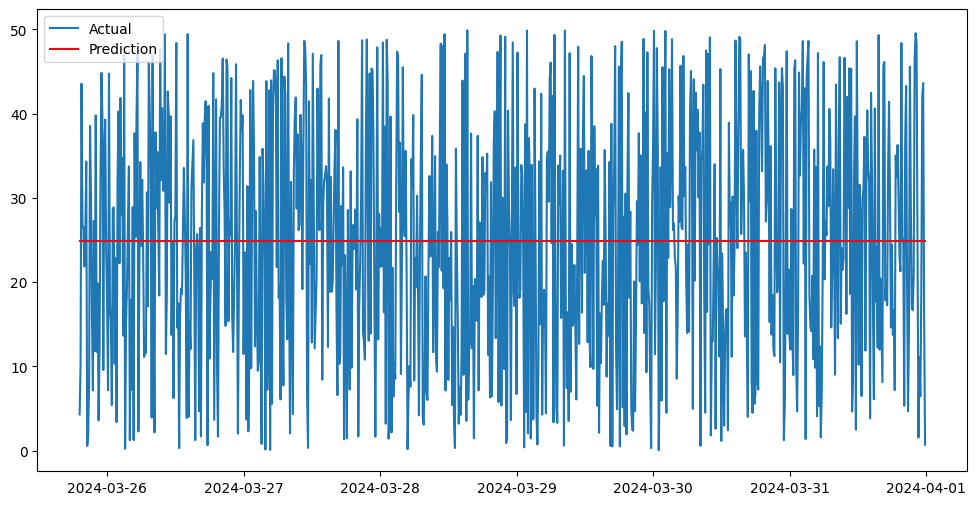

MAE: 12.336950375390657


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

train = train.set_index('yymm')
train = train['Target']

# 주기(frequency) 설정
train.index.freq = '10min'

# Train/Test Split
train_size = int(len(train) * 0.8)
train, test = train[:train_size], train[train_size:]

# ARIMA 모델 학습
model = ARIMA(train, order=(0, 0, 0))
model_fit = model.fit() 
print(model_fit.summary())

# 예측
forecast_data = model_fit.forecast(steps=len(test))
pred = forecast_data

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Prediction', color='red')
plt.legend()
plt.show()

# MAE 계산
mae = mean_absolute_error(test, pred)
print(f'MAE: {mae}')


In [33]:
# pip upgrade
!conda install pmdarima

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... failed


warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package pmdarima-1.8.5-py310h2bbff1b_0 requires python >=3.10,<3.11.0a0, but none of the providers can be installed

Could not solve for environment specs
The following packages are incompatible
├─ pin-1 is installable and it requires
│  └─ python 3.13.* , which can be installed;
└─ pmdarima is not installable because there are no viable options
   ├─ pmdarima [1.8.4|1.8.5|...|2.0.4] would require
   │  └─ python >=3.10,<3.11.0a0 , which conflicts with any installable versions previously reported;
   ├─ pmdarima [1.8.2|1.8.3|...|2.0.1] would require
   │  └─ python >=3.7,<3.8.0a0 , which conflicts with any installable versions previously reported;
   ├─ pmdarima [1.8.2|1.8.3|...|2.0.4] would require
   │  └─ python >=3.8,<3.9.0a0 , which conflicts with any installable versions previously reported;
   ├─ pmdarima [1.8.2|1.8.3|...|2.0.4] would 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=12.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=42650.304, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=39066.778, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=40904.404, Time=1.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=38111.906, Time=0.93 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=37679.734, Time=1.33 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=37411.004, Time=1.81 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=37272.202, Time=1.79 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=11.60 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=5.69 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=36533.026, Time=1.85 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=36531.067, Time=1.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=36530.942, Time=1.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=36529.268, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept  

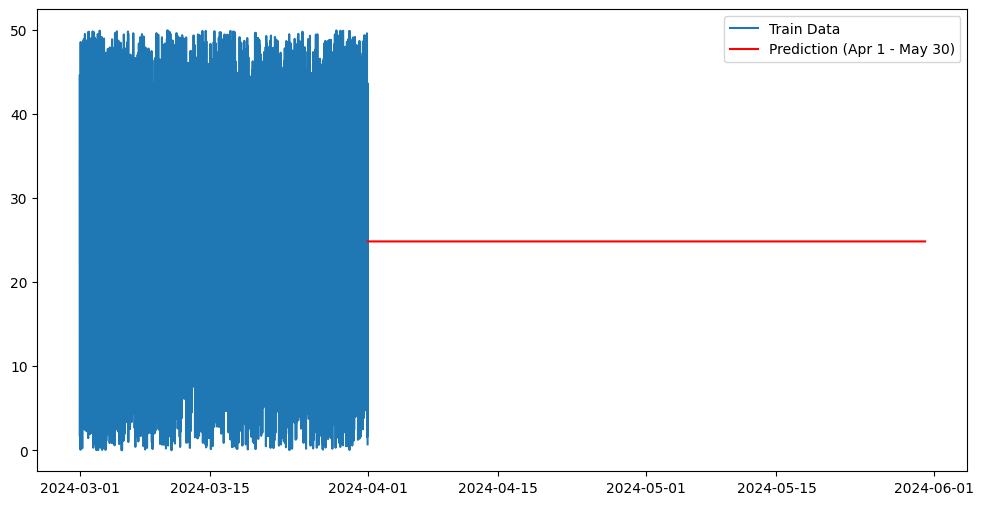

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024으로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# yymm을 인덱스로 설정
train = train.set_index('yymm')
train = train['Target']

# 주기(frequency) 설정
train.index.freq = '10min'

# ARIMA 모델 학습
model = auto_arima(train, seasonal=False, trace=True, stepwise=True)

# 4월 1일부터 5월 30일까지 예측
start_date = pd.Timestamp('2024-04-01 00:00')
end_date = pd.Timestamp('2024-05-30 23:50')
future_periods = (end_date - train.index[-1]) // pd.Timedelta(minutes=10)  # 예측할 기간의 10분 단위 길이 계산

# 예측할 기간이 양수인지 확인
if future_periods > 0:
    # ARIMA 모델로 미래 예측
    forecast = model.predict(n_periods=future_periods)

    # 예측 기간에 대한 인덱스 생성
    future_index = pd.date_range(start=train.index[-1] + pd.Timedelta(minutes=10), periods=future_periods, freq='10min')
    forecast_series = pd.Series(forecast, index=future_index)

    # 예측값 중 4월 1일부터 5월 30일까지 선택
    forecast_filtered = forecast_series[(forecast_series.index >= start_date) & (forecast_series.index <= end_date)]

    # 예측 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train Data')
    plt.plot(forecast_filtered.index, forecast_filtered, label='Prediction (Apr 1 - May 30)', color='red')
    plt.legend()
    plt.show()

else:
    print("예측할 기간이 잘못되었습니다.")

In [ ]:
forecast_filtered.head()

,0
2024-04-01 00:00:00,24.823173
2024-04-01 00:10:00,24.823173
2024-04-01 00:20:00,24.823173
2024-04-01 00:30:00,24.823173
2024-04-01 00:40:00,24.823173


## Prophet

c:\Users\cyeli\.conda\envs\DL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
22:41:24 - cmdstanpy - INFO - Chain [1] start processing
22:41:24 - cmdstanpy - INFO - Chain [1] done processing


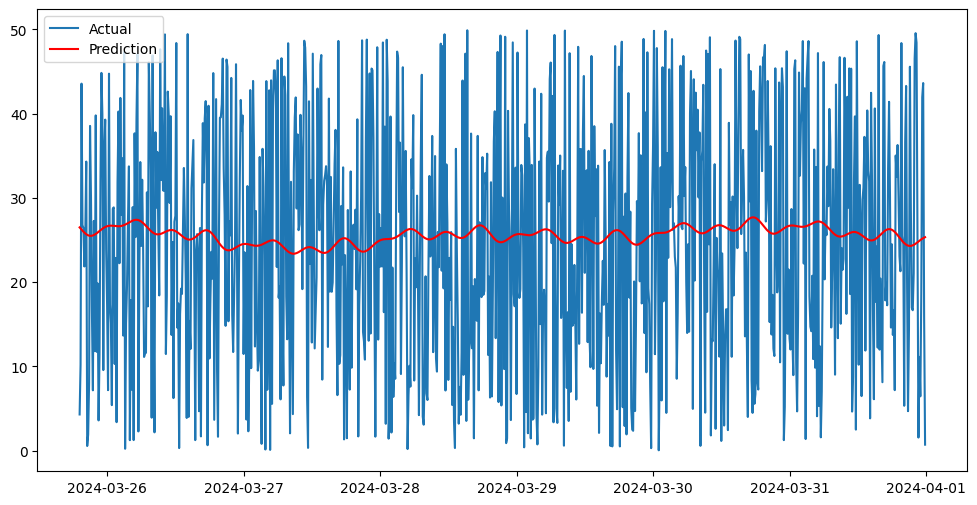

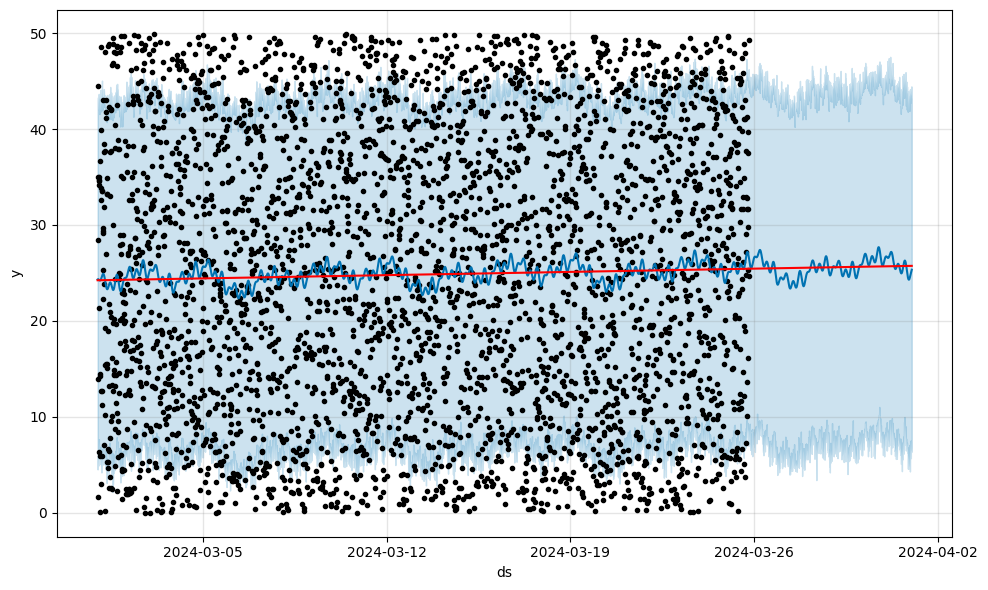

MAE: 12.401102910616524


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

train = train.set_index('yymm')
train = train['Target']

# 주기(frequency) 설정
train.index.freq = '10min'

# Train/Test Split
train_size = int(len(train) * 0.8)
train, test = train[:train_size], train[train_size:]

# Prophet 모델 학습
model = Prophet()
model.fit(pd.DataFrame({'ds': train.index, 'y': train.values}))

# 예측
future = model.make_future_dataframe(periods=len(test), freq='10min')
forecast = model.predict(future)
pred = forecast['yhat'][-len(test):]

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Prediction', color='red')
plt.legend()

# Prophet 모델의 changepoint 시각화
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

# MAE 계산
mae = mean_absolute_error(test, pred)
print(f'MAE: {mae}')

22:41:28 - cmdstanpy - INFO - Chain [1] start processing
22:41:28 - cmdstanpy - INFO - Chain [1] done processing


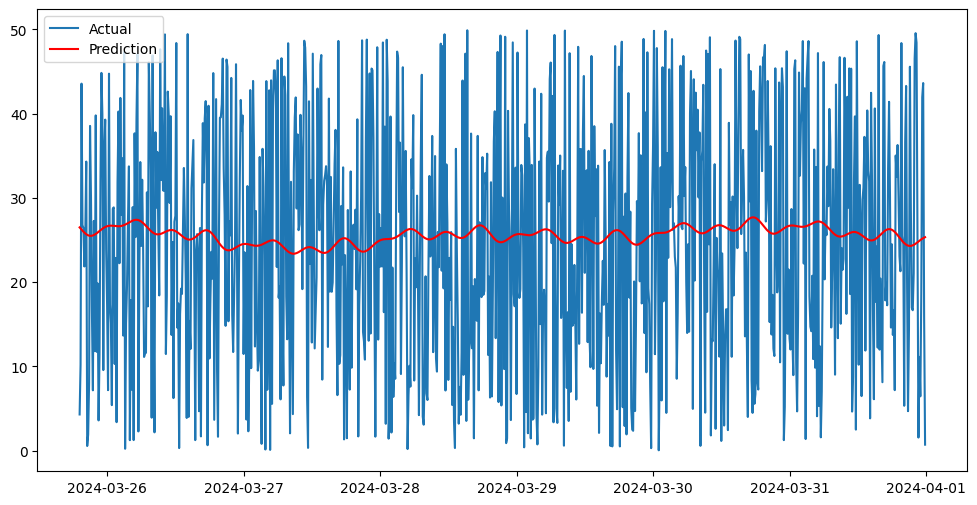

MAE: 12.401102910616524


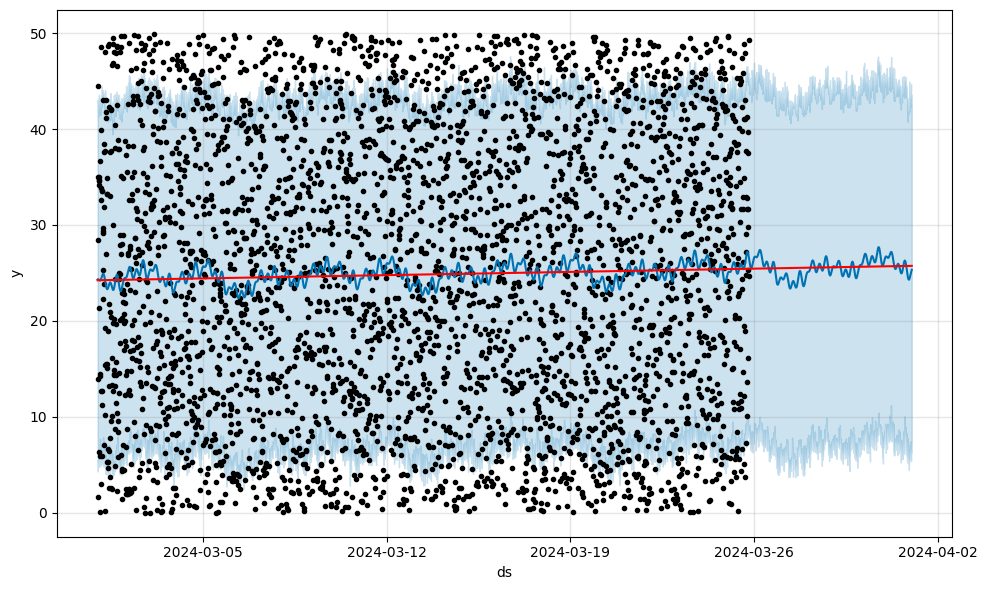

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# 'yymm'을 인덱스로 설정
train = train.set_index('yymm')

# Target 컬럼만 사용
train_data = train['Target']

# 주기(frequency) 설정
train_data.index.freq = '10min'

# Train/Test Split
train_size = int(len(train_data) * 0.8)
train, test = train_data[:train_size], train_data[train_size:]

# Prophet 모델 학습을 위한 데이터프레임 생성
train_df = pd.DataFrame({'ds': train.index, 'y': train.values})

# Prophet 모델 학습
model = Prophet()
model.fit(train_df)

# 예측
future = model.make_future_dataframe(periods=len(test), freq='10min')
forecast = model.predict(future)

# test 구간에 해당하는 예측값 추출
pred = forecast.set_index('ds')['yhat'][-len(test):]

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Prediction', color='red')
plt.legend()
plt.show()

# Prophet 모델의 changepoint 시각화
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)

# MAE 계산
mae = mean_absolute_error(test, pred)
print(f'MAE: {mae}')


22:42:29 - cmdstanpy - INFO - Chain [1] start processing
22:42:29 - cmdstanpy - INFO - Chain [1] done processing


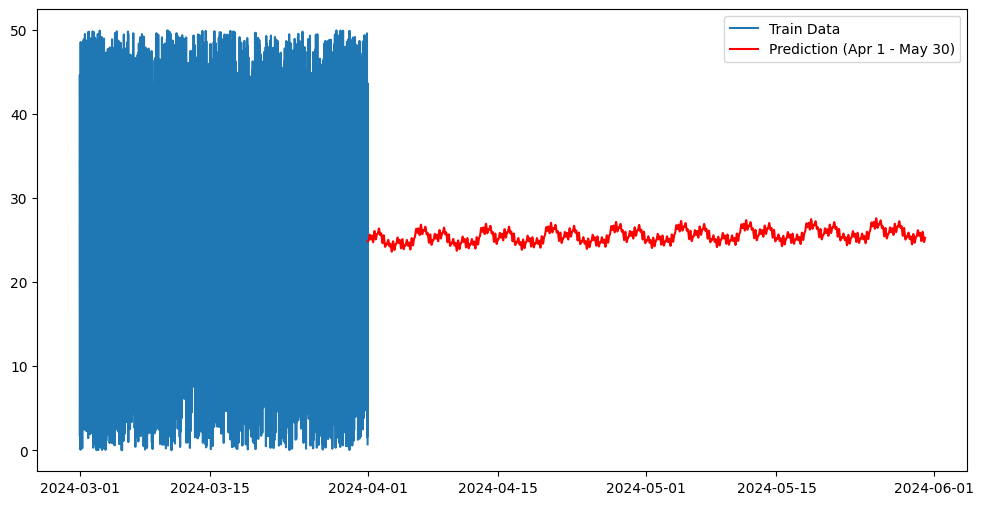

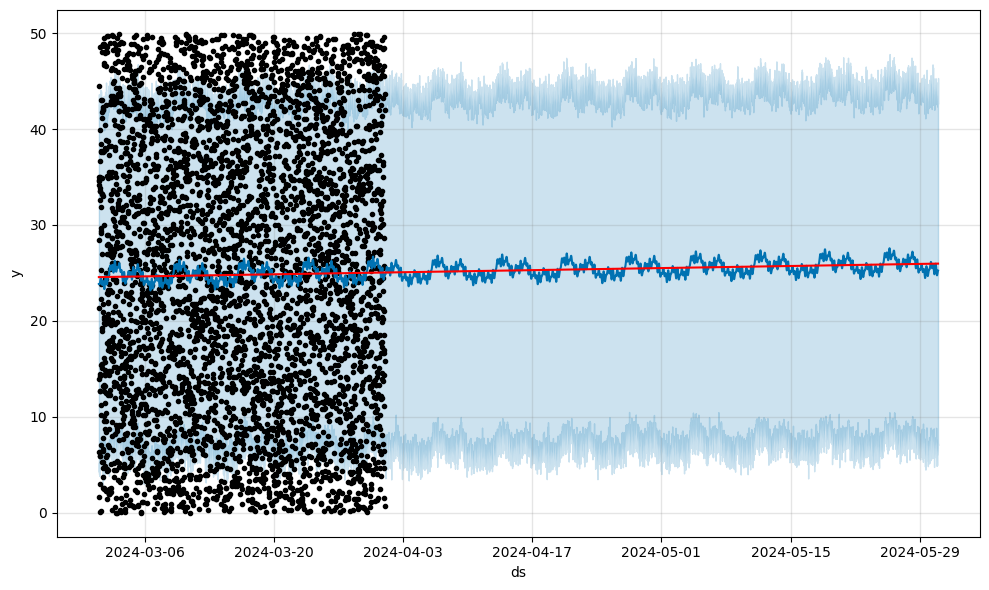

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도를 2024로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

train = train.set_index('yymm')
train = train['Target']

# 주기(frequency) 설정
train.index.freq = '10min'

# Prophet 모델 학습
model = Prophet()
model.fit(pd.DataFrame({'ds': train.index, 'y': train.values}))

# 4월 1일부터 5월 30일까지 예측
start_date = pd.Timestamp('2024-04-01 00:00')
end_date = pd.Timestamp('2024-05-30 23:50')
future_periods = (end_date - train.index[-1]) // pd.Timedelta(minutes=10)  # 예측할 기간의 10분 단위 길이 계산

# 예측할 기간이 양수인지 확인
if future_periods > 0:
    # 미래 데이터 프레임 생성 및 예측
    future = model.make_future_dataframe(periods=future_periods, freq='10min')
    forecast = model.predict(future)

    # 예측 값 중 4월 1일부터 5월 30일까지 선택
    forecast_filtered = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]

    # 예측 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train Data')
    plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Prediction (Apr 1 - May 30)', color='red')
    plt.legend()
    plt.show()

    # Prophet 모델의 changepoint 시각화
    fig = model.plot(forecast)
    a = add_changepoints_to_plot(fig.gca(), model, forecast)

    plt.show()
else:
    print("예측할 기간이 잘못되었습니다. future_period")


In [17]:
forecast_filtered

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4464,2024-04-01 00:00:00,25.047119,5.889946,42.732729,25.047119,25.047119,-0.188701,-0.188701,-0.188701,-0.046204,-0.046204,-0.046204,-0.142497,-0.142497,-0.142497,0.0,0.0,0.0,24.858418
4465,2024-04-01 00:10:00,25.047226,6.156354,43.409153,25.047226,25.047226,-0.179661,-0.179661,-0.179661,-0.037012,-0.037012,-0.037012,-0.142649,-0.142649,-0.142649,0.0,0.0,0.0,24.867565
4466,2024-04-01 00:20:00,25.047334,5.993658,42.330873,25.047334,25.047334,-0.175165,-0.175165,-0.175165,-0.032550,-0.032550,-0.032550,-0.142615,-0.142615,-0.142615,0.0,0.0,0.0,24.872169
4467,2024-04-01 00:30:00,25.047441,5.329167,45.586214,25.047441,25.047441,-0.174501,-0.174501,-0.174501,-0.032107,-0.032107,-0.032107,-0.142394,-0.142394,-0.142394,0.0,0.0,0.0,24.872940
4468,2024-04-01 00:40:00,25.047548,7.151388,44.451684,25.047548,25.047548,-0.176802,-0.176802,-0.176802,-0.034813,-0.034813,-0.034813,-0.141989,-0.141989,-0.141989,0.0,0.0,0.0,24.870746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,2024-05-30 23:10:00,25.973293,6.410096,43.312258,25.973159,25.973419,-0.820915,-0.820915,-0.820915,-0.173751,-0.173751,-0.173751,-0.647164,-0.647164,-0.647164,0.0,0.0,0.0,25.152378
13100,2024-05-30 23:20:00,25.973401,6.343270,44.904224,25.973267,25.973527,-0.788840,-0.788840,-0.788840,-0.137486,-0.137486,-0.137486,-0.651354,-0.651354,-0.651354,0.0,0.0,0.0,25.184561
13101,2024-05-30 23:30:00,25.973508,7.235482,42.926596,25.973374,25.973634,-0.761831,-0.761831,-0.761831,-0.106325,-0.106325,-0.106325,-0.655505,-0.655505,-0.655505,0.0,0.0,0.0,25.211677
13102,2024-05-30 23:40:00,25.973615,7.026418,42.629872,25.973481,25.973741,-0.740278,-0.740278,-0.740278,-0.080662,-0.080662,-0.080662,-0.659615,-0.659615,-0.659615,0.0,0.0,0.0,25.233337


In [21]:
test = pd.read_csv('./test_set.csv')
test['yymm'] = pd.to_datetime('2024' + test['yymm'], format='%Y%m%d %H:%M')
test

,yymm,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
0,2024-04-27 06:50:00,-4.094,15.750,0.110,-5.288,-0.196,1.548,-5.159,-0.706,-3.633,...,23.002,-1.053,-1.255,-2.244,-37.695,-4.644,-2.389,-2.841,-2.906,-0.239
1,2024-04-04 11:40:00,5.473,-5.417,3.110,3.172,1.114,-31.876,1.684,2.960,6.007,...,1.669,0.447,0.645,4.306,162.305,7.219,3.811,1.825,3.024,1.504
2,2024-04-24 19:30:00,-5.937,-11.750,-3.160,-5.874,0.904,-27.379,-9.449,0.960,-4.530,...,1.669,0.413,0.745,-2.911,2.305,-2.544,-8.022,-0.551,-6.936,2.294
3,2024-04-26 15:50:00,-4.327,-4.417,-2.954,-4.688,0.114,-14.582,-7.549,-0.373,-3.396,...,1.669,-0.897,-0.255,-2.727,-47.695,0.386,-6.389,-0.641,-5.036,-0.529
4,2024-05-13 13:40:00,4.633,-21.750,-1.420,5.487,5.014,-53.609,-1.889,0.627,6.530,...,-9.664,4.277,4.935,8.839,182.305,15.889,4.442,7.449,4.212,3.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2024-04-04 15:10:00,2.733,-19.084,-0.357,0.738,1.214,-43.446,-5.359,2.960,2.874,...,1.669,1.203,0.845,3.689,112.305,8.819,2.311,1.949,-0.346,2.471
2996,2024-05-18 03:40:00,-0.627,11.250,1.805,5.142,3.214,-12.609,1.049,-2.040,0.330,...,-17.331,1.513,2.345,3.639,-37.695,1.589,1.948,0.759,0.841,1.684
2997,2024-04-01 15:30:00,-1.937,-23.250,-3.690,-3.188,0.978,-26.576,-4.859,-0.540,-1.970,...,-3.831,0.703,0.245,-1.311,-47.695,4.656,-0.652,1.889,-3.536,0.761
2998,2024-05-15 01:00:00,-6.027,2.250,-3.615,-5.188,3.404,-25.052,-11.949,-2.040,-5.260,...,1.669,2.203,3.071,-1.661,-47.695,-5.048,-4.462,0.702,-7.146,3.104


In [22]:
# test DataFrame에 target 컬럼 추가 (빈 값으로 초기화)
test['target'] = None

# yymm과 ds를 기준으로 join하여 forecast_filtered의 yhat 값을 test의 target 컬럼에 저장
test = test.merge(forecast_filtered[['ds', 'yhat']], left_on='yymm', right_on='ds', how='left')

# yhat 값을 target 컬럼에 복사
test['target'] = test['yhat']

# 필요 없는 ds, yhat 컬럼 제거
test = test.drop(columns=['ds', 'yhat'])

test.head()

,yymm,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,target
0,2024-04-27 06:50:00,-4.094,15.750,0.110,-5.288,-0.196,1.548,-5.159,-0.706,-3.633,...,-1.053,-1.255,-2.244,-37.695,-4.644,-2.389,-2.841,-2.906,-0.239,26.406887
1,2024-04-04 11:40:00,5.473,-5.417,3.110,3.172,1.114,-31.876,1.684,2.960,6.007,...,0.447,0.645,4.306,162.305,7.219,3.811,1.825,3.024,1.504,24.871499
2,2024-04-24 19:30:00,-5.937,-11.750,-3.160,-5.874,0.904,-27.379,-9.449,0.960,-4.530,...,0.413,0.745,-2.911,2.305,-2.544,-8.022,-0.551,-6.936,2.294,24.543669
3,2024-04-26 15:50:00,-4.327,-4.417,-2.954,-4.688,0.114,-14.582,-7.549,-0.373,-3.396,...,-0.897,-0.255,-2.727,-47.695,0.386,-6.389,-0.641,-5.036,-0.529,24.808299
4,2024-05-13 13:40:00,4.633,-21.750,-1.420,5.487,5.014,-53.609,-1.889,0.627,6.530,...,4.277,4.935,8.839,182.305,15.889,4.442,7.449,4.212,3.085,25.420115


In [23]:
test['target'].head(20)

0     26.406887
1     24.871499
2     24.543669
3     24.808299
4     25.420115
5     26.110300
6     25.673458
7     27.501639
8     25.854269
9     24.875373
10    25.157792
11    25.025351
12    24.957931
13    26.726171
14    26.351036
15    26.876409
16    25.269566
17    26.151162
18    25.940765
19    24.748369
Name: target, dtype: float64

In [24]:
submission = pd.DataFrame(test['target'], columns = ['predict'])
submission['predict'] = test['target']
submission.head()

,predict
0,26.406887
1,24.871499
2,24.543669
3,24.808299
4,25.420115
